### Exercise 07.1

Use the Monte Carlo NVT code we have provided to print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

- <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to obtain the Monte Carlo correlation time</span> via a fit with an exponential function. This will suggest you how large should be the blocks in your simulations.

Il programma fornito è stato leggermente modificato in modo che ad ogni passo Monte Carlo venissero salvati i valori di energia potenziale e pressione. I file conteneti questi valori sono salvati nella cartella *Exercise7.1/code/risultati/output_instant_epot*(oppure *pres*)*.dat*. I risultati di ogni nuova simulazione vengono aggiunti a questi file in *append* senza sovrascrivere i risultati precedenti. Se si vuole resettare il file basta digitare il comando di *make clean* e ricompilare il programma.

Questi file vengono poi caricati dallo script di python implementato qui sotto che ne legge i primi 30003 elementi (tre simulazioni da 10001 step Monte Carlo) e traccia le tre funzione di autocorrelazione delle simulazioni richieste:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)


Osserviamo che i gafici confermano per tutte e tre le condizioni termodinamiche studiate una decrescita quasi esponenziale della correlazione. I tempi scala delle tre simulazioni, invece, sono differenti. Il numero di step Monte Carlo per cui l'autocorrelazione inizia a oscillare attorno allo zero sono:
- $solid\sim100$
- $liquid\sim150$
- $gas\sim20$


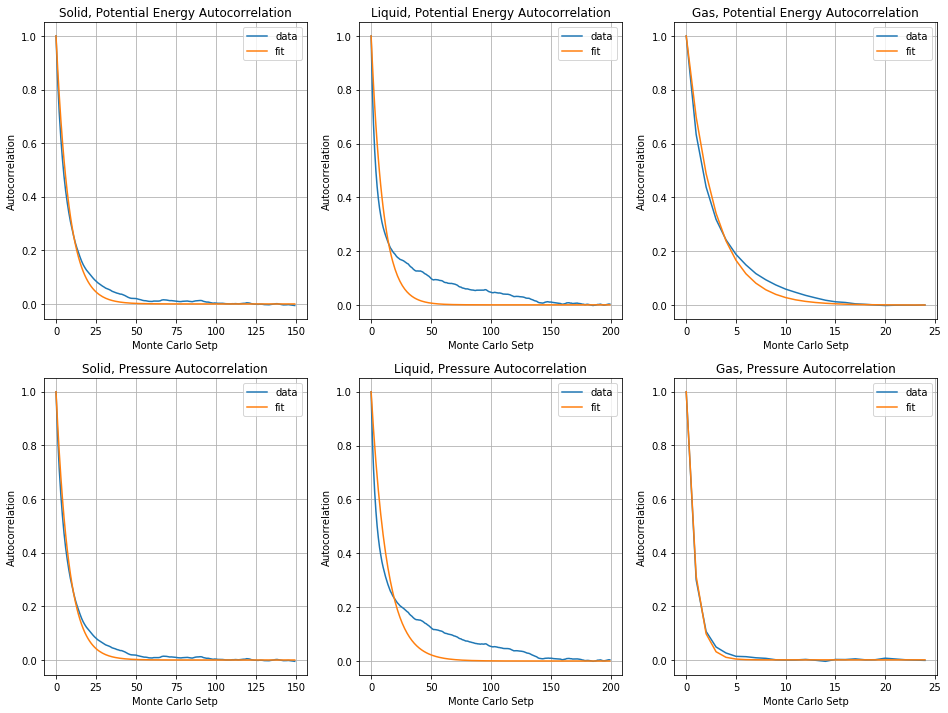

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import pandas as pd
fig=plt.figure(figsize=(16, 12))

def f(x,a):
    return np.exp(-x/a)

taumax = [150,200,25,150,200,25]
titlelist = ['Solid, Potential Energy Autocorrelation','Liquid, Potential Energy Autocorrelation','Gas, Potential Energy Autocorrelation','Solid, Pressure Autocorrelation','Liquid, Pressure Autocorrelation','Gas, Pressure Autocorrelation']
datafile = ['./code/risultati/output_istant_epot.dat','./code/risultati/output_istant_pres.dat']
titleosservable = ['Potential Energy','Pressure']
for j in range(0,6):
        autocorrelation = np.zeros(taumax[j])
        data = np.loadtxt(datafile[int(j/3)],skiprows=100001*(j%3), max_rows=100001)
        for tau in range(0,taumax[j]):
            x_t = x_tau = x_t_tau = 0

            for i in range(0,len(data)-tau):
                x_t += data[i]
                x_tau += data[i+tau]
                x_t_tau += data[i]*data[i+tau]

            x_t /= (len(data)-tau)
            x_tau /= (len(data)-tau)
            x_t_tau /= (len(data)-tau)
            autocorrelation[tau] = (x_t_tau-(x_t*x_tau))/np.var(data)

        #faccio il fit con un esponenziale
        x = np.arange(0,taumax[j])
        p_opt, p_cov = curve_fit(f, np.arange(0,taumax[j]), autocorrelation)
    
        plt.subplot(2,3,j+1)
        plt.plot(x,autocorrelation, label="data")
        plt.plot(x,f(x,p_opt[0]), label="fit")
        plt.xlabel('Monte Carlo Setp')
        plt.ylabel('Autocorrelation')
        plt.title(titlelist[j])
        plt.legend()
        plt.grid()

plt.show()

- Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

Dai grafici ottenuti si osserva che quando i blocchi superano la lunghezza ottimale (ricavata dalla funzione di autocorrelazione) l'errore sull'osservabile smette di crescere con regolarità e inizia ad oscillare con salti sempre magiori al screscere di L.

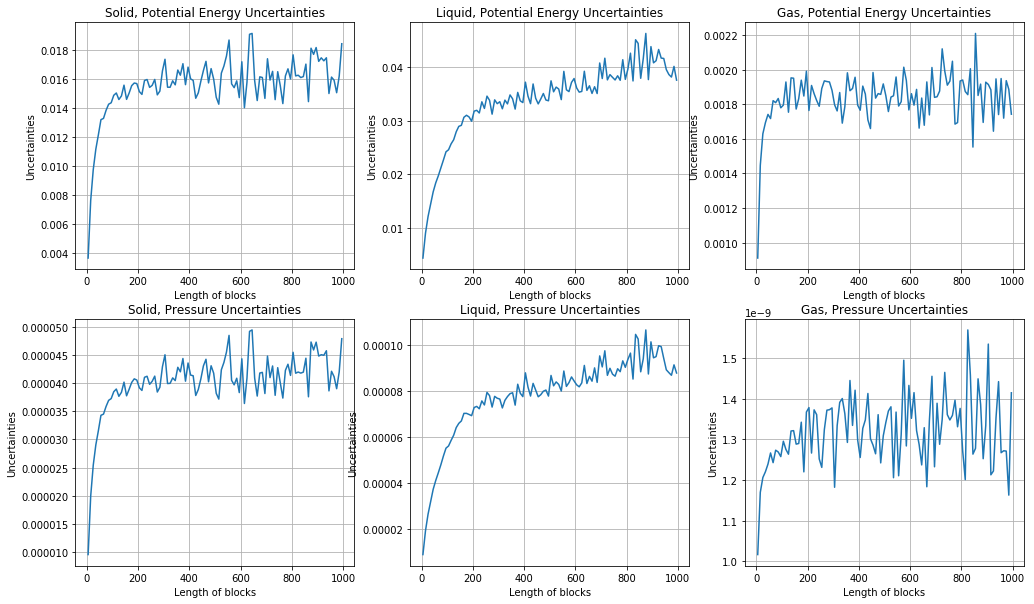

In [67]:
namefile = ['./code/risultati/output_istant_epot.dat','./code/risultati/output_istant_pres.dat']
titlelist = ['Solid, Potential Energy Uncertainties','Liquid, Potential Energy Uncertainties','Gas, Potential Energy Uncertainties','Solid, Pressure Uncertainties','Liquid, Pressure Uncertainties','Gas, Pressure Uncertainties']
fig=plt.figure(figsize=(17, 10))

for k in range(6):
    data = np.loadtxt(namefile[int(k/3)], skiprows=100001*(k%3), max_rows=100000)
    M = len(data)
    L = np.arange(5,1000,10)
    N = M/L
    error = np.zeros(len(L))

    for j in range(len(L)):
        ave = np.zeros(int(N[j]))
        ave2 = np.zeros(int(N[j]))
        blocks = np.array_split(data,int(N[j]))
        for i in range(int(N[j])):
            ave[i] = np.mean(blocks[i])
            ave2[i] = np.mean(blocks[i])*np.mean(blocks[i])
        finalave = np.mean(ave)
        finalave2 = np.mean(ave2)
        error[j] = (finalave2-finalave*finalave)/float(len(ave))
    
    plt.subplot(2,3,k+1) 
    plt.plot(L, error)
    plt.xlabel("Length of blocks")
    plt.ylabel("Uncertainties")
    plt.grid()
    plt.title(titlelist[k])
plt.show()